In [1]:
import deepquantum as dq
import numpy as np
import torch

# quantum u gate map

 Use `UnitaryMapper` for mapping the quantum gate to photonic quantum circuit. \
 nmode: 2*n_qubits + 2 \
 auxiliary modes: [0,0] or [1,0] in the last 2modes \
succcess probability: preferred 1/3 for 2qubtis, 1/4 for 3 qubits 

## map the quantum gate

In [3]:
swap = np.array([[1,0,0,0],
                 [0,0,1,0],
                 [0,1,0,0],
                 [0,0,0,1]])
iswap = np.array([[1,0,0,0],
                  [0,0,1j,0],
                  [0,1j,0,0],
                  [0,0,0,1]])
cnot = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

In [12]:
nqubit = 2
nmode = 6
ugate = swap
aux = [0,0]
aux_pos = [4,5]
success = 1
umap = dq.UnitaryMapper(nqubit=nqubit, nmode=nmode, ugate=ugate, success=success, aux=aux, aux_pos=aux_pos)

In [13]:
# umap.ugate = swap
# umap.success = 1/3
Re3 = umap.solve_eqs_real(total_trials=1, trials=10, precision=1e-5) # for real solution

True 1.0494630126730274e-08
True 6.61288254204355e-09s: 1
True 8.1127122638361e-09ss: 2
True 6.775881025557729e-09: 3
True 1.863444178408924e-09: 4
True 5.2617358346694725e-09 5
True 7.4166196306049405e-09 6
True 3.1864755863228264e-09 7
True 7.2511169301068075e-09 8
True 8.152780454826219e-09: 9


In [16]:
np.round(Re3[0][0][0], 3)

array([[-0.   ,  0.   , -1.   , -0.   , -0.   ,  0.   ],
       [ 0.   ,  0.   , -0.   , -1.   ,  0.   ,  0.   ],
       [-1.   , -0.   ,  0.   , -0.   , -0.   , -0.   ],
       [-0.   , -1.   , -0.   , -0.   ,  0.   , -0.   ],
       [-0.   ,  0.   , -0.   , -0.   ,  0.779, -0.627],
       [-0.   , -0.   , -0.   ,  0.   ,  0.627,  0.779]])

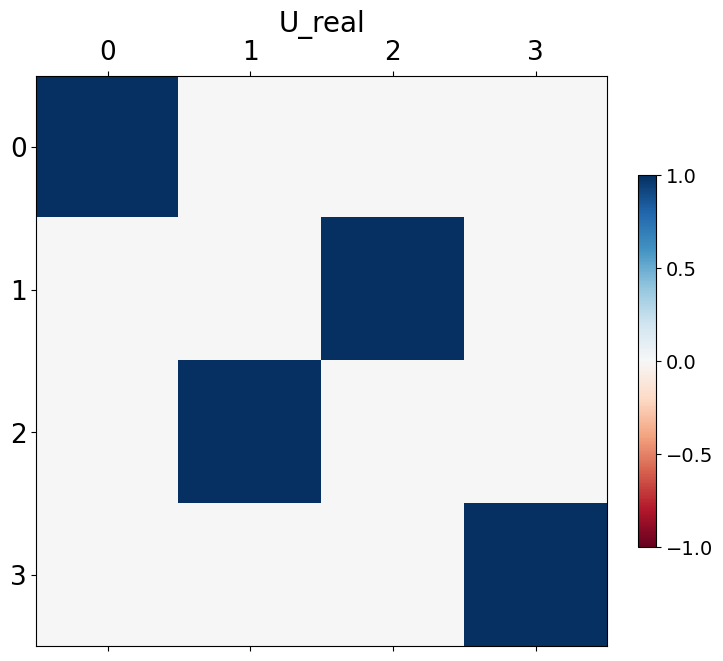

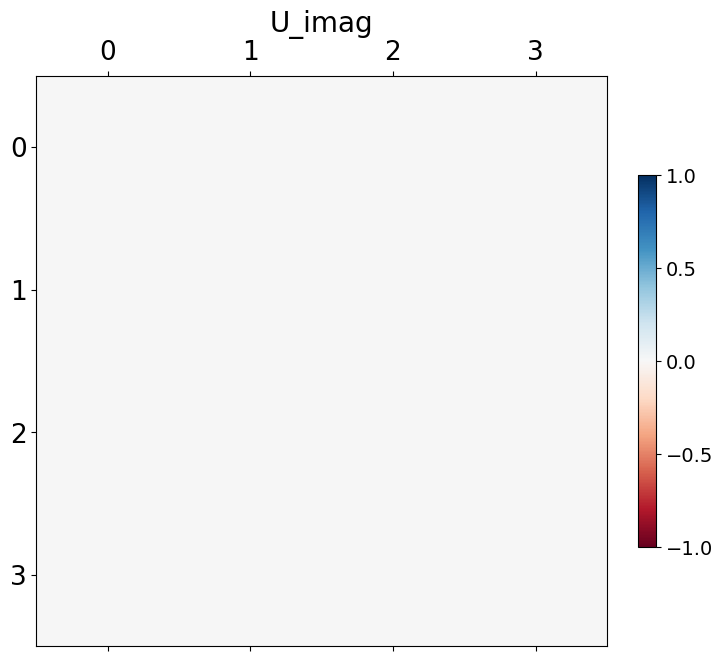

In [14]:
## check result
result = (Re3[0][0][0])
transfer_mat = umap.get_transfer_mat(result)
umap.plot_u(transfer_mat, vmin=-1)
# np.save("cnot_test.npy", re) # save the first result

## check results

In [7]:
cnot_test = result
init_state = [1,0,1,0,0,0]
test_circuit = dq.QumodeCircuit(nmode=6, init_state=init_state, basis=True)
test_circuit.any(cnot_test, list(range(6)))
test_circuit.draw()

In [8]:
re = test_circuit(state=[1,0,0,1,0,0])

In [9]:
re

{|000110>: tensor([-0.4325+0.j]),
 |010010>: tensor([0.4325+0.j]),
 |100100>: tensor([0.3333+0.j]),
 |110000>: tensor([-0.3333+0.j]),
 |000011>: tensor([-0.3222+0.j]),
 |100001>: tensor([0.3058+0.j]),
 |000002>: tensor([-0.2433+0.j]),
 |000020>: tensor([0.2433+0.j]),
 |000101>: tensor([-0.1875+0.j]),
 |010001>: tensor([0.1875+0.j]),
 |100010>: tensor([-0.1326+0.j]),
 |020000>: tensor([3.7649e-12+0.j]),
 |000200>: tensor([-2.8237e-12+0.j]),
 |001100>: tensor([-1.9966e-12+0.j]),
 |011000>: tensor([1.9966e-12+0.j]),
 |001001>: tensor([-1.8319e-12+0.j]),
 |200000>: tensor([9.4123e-13+0.j]),
 |001010>: tensor([7.9422e-13+0.j]),
 |010100>: tensor([-6.6555e-13+0.j]),
 |101000>: tensor([-3.5454e-22+0.j]),
 |002000>: tensor([2.9695e-33+0.j])}

# decompose clements

 decomposing the optical qunatum circuit(unitary matrix) to clements structure

## 6x6 case

In [2]:
u6x6 = np.array([[1, 0, 1, -1, 0, 0],
                 [0, 1, 0 ,0,  0, np.sqrt(2)],
                 [1,  0, 0, 1, 1, 0],
                 [-1, 0, 1, 0, 1, 0],
                 [0,  0, 1, 1, -1,0],
                 [0, np.sqrt(2), 0,0,0,-1]])/np.sqrt(3)

In [3]:
ud = dq.UnitaryDecomposer(u6x6)
mzi_info = ud.decomp()
mzi_info[2]

{(0, 0): 3.1416,
 (0, 1): 3.1416,
 (0, 2): 0.7854,
 (0, 3): 1.231,
 (0, 4): 6.127,
 (0, 5): 3.1416,
 (0, 6): 0.3261,
 (1, 0): 6.0792,
 (1, 1): 0.0,
 (1, 2): 4.1088,
 (1, 3): 1.5319,
 (1, 4): 2.5704,
 (1, 5): 0.397,
 (1, 6): 5.4112,
 (2, 0): 3.1416,
 (2, 1): 1.5708,
 (2, 2): 3.6656,
 (2, 3): 0.3173,
 (2, 4): 3.9464,
 (2, 5): 0.3894,
 (2, 6): 5.0926,
 (3, 0): 3.9684,
 (3, 1): 1.1945,
 (3, 2): 0.9735,
 (3, 3): 1.1945,
 (3, 4): 0.7788,
 (3, 5): 3.1416,
 (3, 6): 2.9415,
 (4, 0): 0.3186,
 (4, 1): 2.5872,
 (4, 2): 4.1151,
 (4, 3): 0.3173,
 (4, 4): 1.2921,
 (4, 5): 0.0,
 (4, 6): 6.0831,
 (5, 0): 6.0831}

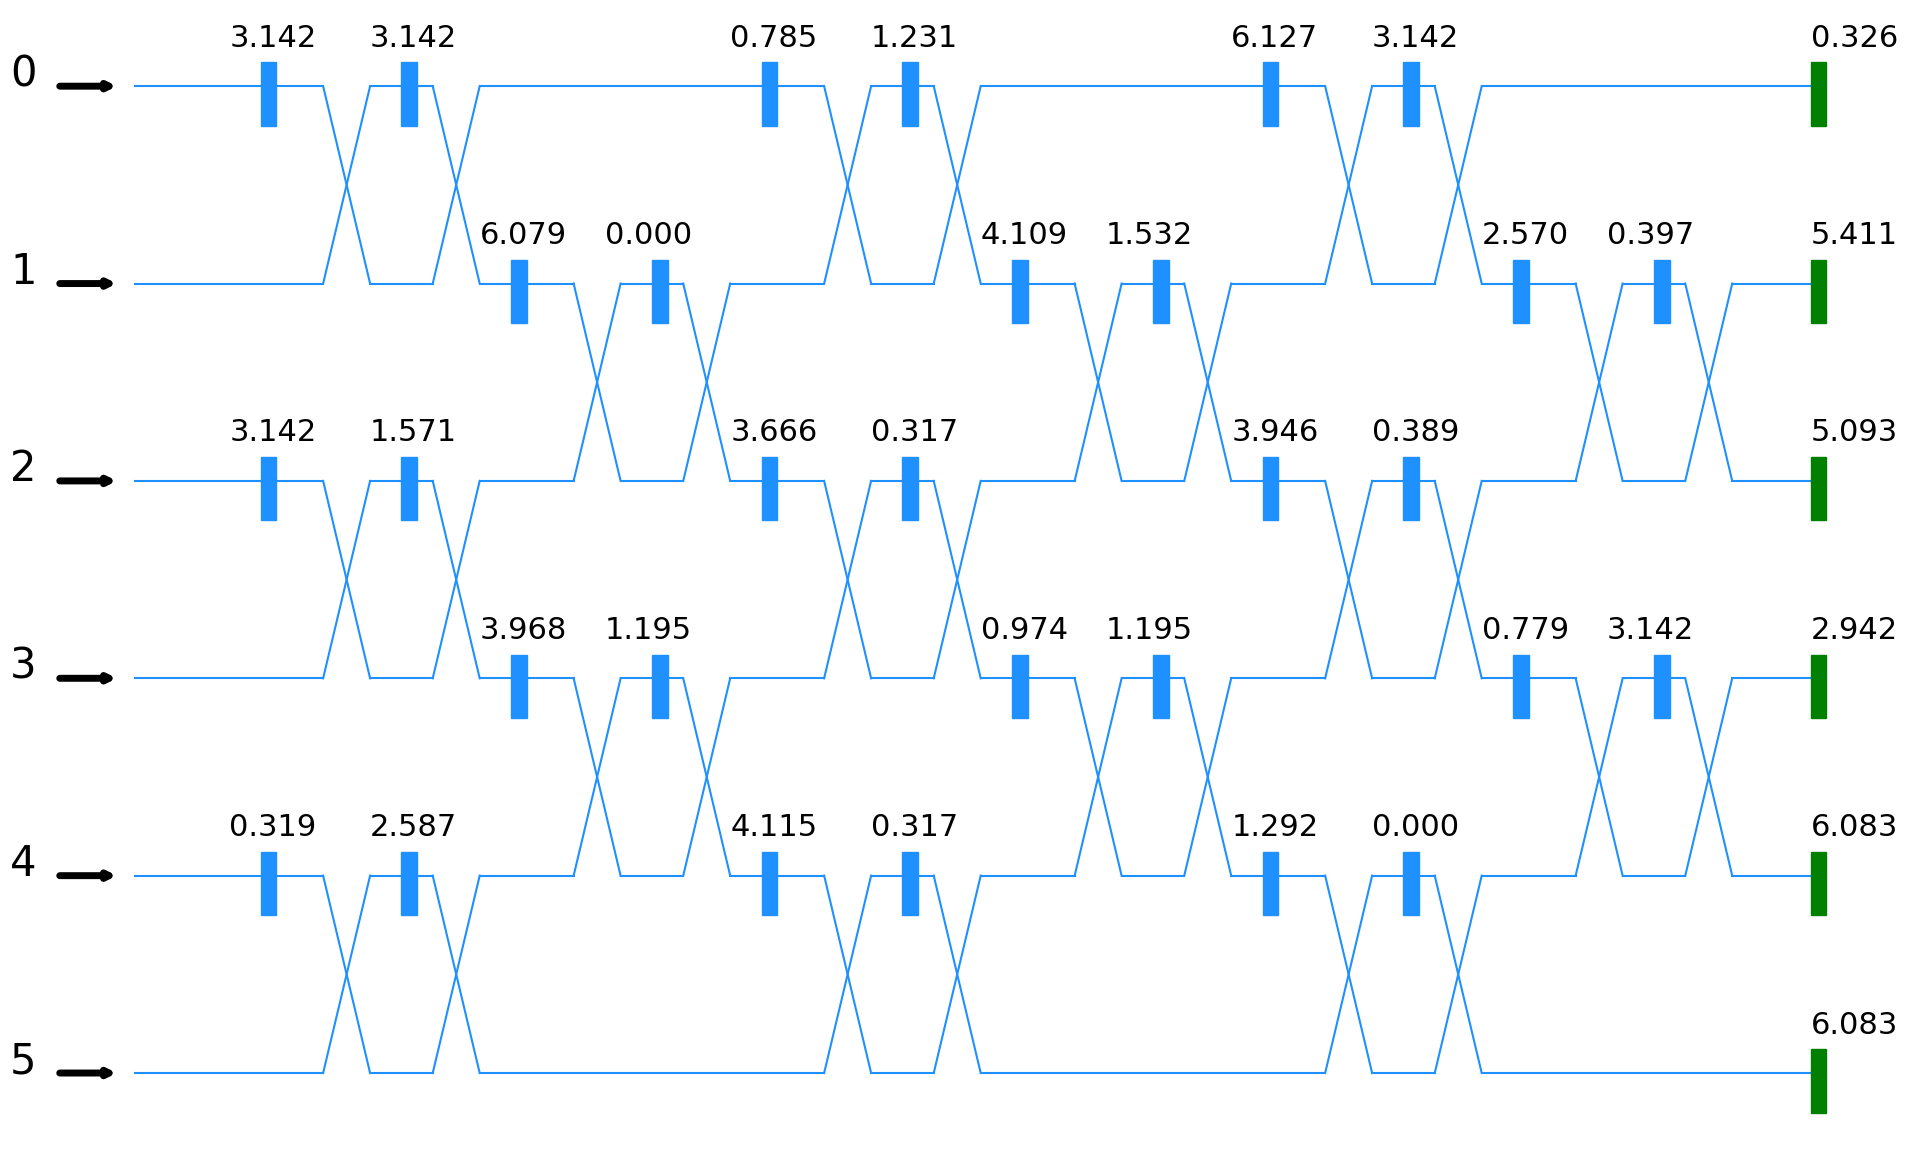

In [4]:
p_mzi = dq.DrawClements(6,mzi_info[0])
p_mzi.plotting_clements()

## 8x8 case

In [15]:
u8x8 = np.eye(8,8)
ud = dq.UnitaryDecomposer(u8x8)
mzi_info = ud.decomp()

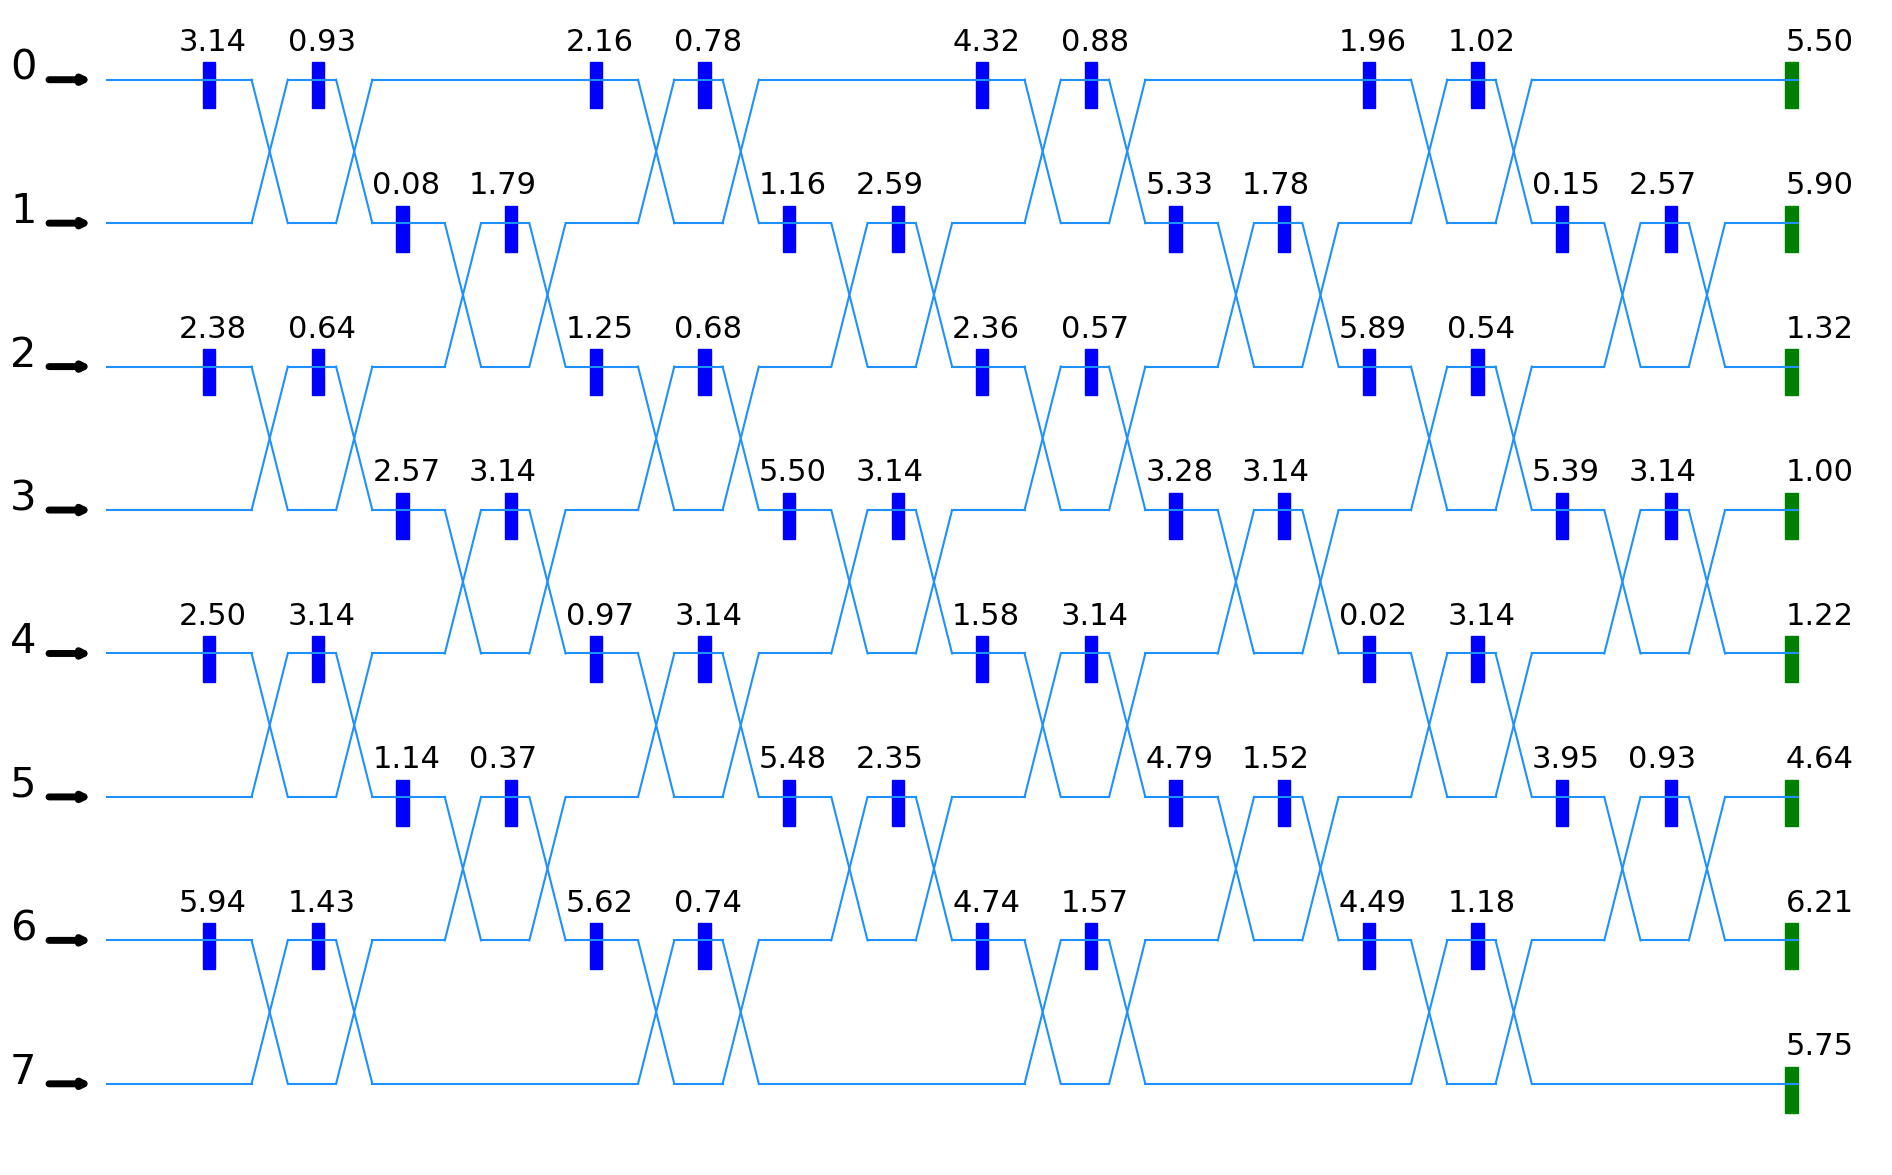

In [16]:
p_mzi = dq.DrawClements(8,mzi_info[0])
p_mzi.plotting_clements()

In [17]:
p_mzi.ps_position

{(0, 0): 3.1416,
 (0, 1): 0.9273,
 (0, 2): 2.1616,
 (0, 3): 0.7752,
 (0, 4): 4.3217,
 (0, 5): 0.8798,
 (0, 6): 1.9594,
 (0, 7): 1.0247,
 (0, 8): 5.4951,
 (1, 0): 0.0752,
 (1, 1): 1.7908,
 (1, 2): 1.1645,
 (1, 3): 2.5852,
 (1, 4): 5.3348,
 (1, 5): 1.7785,
 (1, 6): 0.1508,
 (1, 7): 2.5681,
 (1, 8): 5.9047,
 (2, 0): 2.3782,
 (2, 1): 0.6377,
 (2, 2): 1.2455,
 (2, 3): 0.6841,
 (2, 4): 2.3566,
 (2, 5): 0.5719,
 (2, 6): 5.8933,
 (2, 7): 0.5361,
 (2, 8): 1.3179,
 (3, 0): 2.5703,
 (3, 1): 3.1416,
 (3, 2): 5.5034,
 (3, 3): 3.1416,
 (3, 4): 3.2802,
 (3, 5): 3.1416,
 (3, 6): 5.3868,
 (3, 7): 3.1416,
 (3, 8): 0.997,
 (4, 0): 2.4963,
 (4, 1): 3.1416,
 (4, 2): 0.9728,
 (4, 3): 3.1416,
 (4, 4): 1.5785,
 (4, 5): 3.1416,
 (4, 6): 0.0168,
 (4, 7): 3.1416,
 (4, 8): 1.2189,
 (5, 0): 1.1413,
 (5, 1): 0.3674,
 (5, 2): 5.4773,
 (5, 3): 2.3519,
 (5, 4): 4.7874,
 (5, 5): 1.5155,
 (5, 6): 3.9526,
 (5, 7): 0.9273,
 (5, 8): 4.6401,
 (6, 0): 5.9447,
 (6, 1): 1.4337,
 (6, 2): 5.616,
 (6, 3): 0.736,
 (6, 4): 4.7445,


## Clements in ansatz

In [4]:
clements = dq.Clements(nmode=6, init_state=[1,0,0,1,0,0], cutoff=3)

In [5]:
clements.draw()

In [6]:
mzi_info[2]

{(0, 0): 3.1416,
 (0, 1): 3.1416,
 (0, 2): 0.7854,
 (0, 3): 1.231,
 (0, 4): 6.127,
 (0, 5): 3.1416,
 (0, 6): 0.3261,
 (1, 0): 6.0792,
 (1, 1): 0.0,
 (1, 2): 4.1088,
 (1, 3): 1.5319,
 (1, 4): 2.5704,
 (1, 5): 0.397,
 (1, 6): 5.4112,
 (2, 0): 3.1416,
 (2, 1): 1.5708,
 (2, 2): 3.6656,
 (2, 3): 0.3173,
 (2, 4): 3.9464,
 (2, 5): 0.3894,
 (2, 6): 5.0926,
 (3, 0): 3.9684,
 (3, 1): 1.1945,
 (3, 2): 0.9735,
 (3, 3): 1.1945,
 (3, 4): 0.7788,
 (3, 5): 3.1416,
 (3, 6): 2.9415,
 (4, 0): 0.3186,
 (4, 1): 2.5872,
 (4, 2): 4.1151,
 (4, 3): 0.3173,
 (4, 4): 1.2921,
 (4, 5): 0.0,
 (4, 6): 6.0831,
 (5, 0): 6.0831}

In [9]:
data = clements.dict2data(mzi_info[2]) # encoding the 6x6 data
re = clements(data=data)
re

{|200000>: tensor([[-0.4714-2.5660e-05j]]),
 |002000>: tensor([[0.4714-1.1266e-05j]]),
 |100010>: tensor([[0.3333-9.4468e-06j]]),
 |001100>: tensor([[-0.3333+3.9635e-05j]]),
 |001010>: tensor([[0.3333-2.2506e-05j]]),
 |000110>: tensor([[-0.3333+5.4183e-05j]]),
 |100100>: tensor([[0.3333-2.6601e-05j]]),
 |101000>: tensor([[1.8418e-05+8.5761e-09j]]),
 |011000>: tensor([[-1.1728e-05+1.0254e-05j]]),
 |010100>: tensor([[9.0628e-06-4.0271e-06j]]),
 |000200>: tensor([[9.8818e-06+1.1910e-08j]]),
 |010010>: tensor([[-2.6648e-06+6.2279e-06j]]),
 |110000>: tensor([[-6.3984e-06-2.2016e-06j]]),
 |001001>: tensor([[-1.7706e-06+2.1288e-07j]]),
 |000011>: tensor([[-1.7065e-06+3.4970e-10j]]),
 |000020>: tensor([[-1.7065e-06+2.6502e-10j]]),
 |100001>: tensor([[1.6423e-06+2.1240e-07j]]),
 |000101>: tensor([[6.4133e-08-2.1261e-07j]]),
 |020000>: tensor([[-3.8941e-12-2.8499e-10j]]),
 |010001>: tensor([[4.2937e-11-2.3516e-11j]]),
 |000002>: tensor([[4.6401e-13-1.5393e-12j]])}

In [40]:
re = clements(data=data)
re

{|200000>: tensor([[0.4714+2.8568e-05j]]),
 |000200>: tensor([[-0.4714+9.8520e-05j]]),
 |100010>: tensor([[0.3333-7.0549e-06j]]),
 |001100>: tensor([[0.3333-3.7590e-05j]]),
 |001010>: tensor([[0.3333-2.0114e-05j]]),
 |000110>: tensor([[-0.3333+5.1791e-05j]]),
 |101000>: tensor([[0.3333+6.7432e-06j]]),
 |100100>: tensor([[1.9550e-05-3.9258e-07j]]),
 |110000>: tensor([[-9.5575e-06+4.0286e-06j]]),
 |010100>: tensor([[4.2276e-06+8.4259e-06j]]),
 |002000>: tensor([[-8.6006e-06-5.6167e-07j]]),
 |011000>: tensor([[-6.8919e-06-2.1986e-06j]]),
 |010010>: tensor([[-2.6649e-06+6.2279e-06j]]),
 |100001>: tensor([[-1.7716e-06+2.1090e-07j]]),
 |000011>: tensor([[-1.7065e-06+3.3746e-10j]]),
 |000020>: tensor([[-1.7065e-06+2.5277e-10j]]),
 |000101>: tensor([[-1.6414e-06-2.1027e-07j]]),
 |001001>: tensor([[-6.5078e-08+2.1070e-07j]]),
 |020000>: tensor([[1.3602e-10-1.5724e-10j]]),
 |010001>: tensor([[3.1869e-11+8.3495e-12j]]),
 |000002>: tensor([[4.7119e-13-1.5255e-12j]])}

In [38]:
u2 = clements.get_unitary()
u2

tensor([[ 5.7737e-01+1.8239e-05j,  1.6779e-06+7.8501e-11j,
          5.7734e-01+1.6764e-05j, -5.7734e-01-1.3188e-05j,
         -2.0387e-06-2.0447e-07j, -5.8297e-07+2.2752e-11j],
        [-4.6077e-06+1.0794e-05j,  5.7734e-01-8.7500e-05j,
         -1.1942e-05-3.8163e-06j, -1.5709e-05+6.9644e-06j,
         -4.1244e-05-8.3813e-07j,  8.1650e-01-6.5804e-05j],
        [ 5.7734e-01-4.4107e-06j,  1.7561e-05+7.4756e-06j,
         -1.0547e-05-6.8303e-07j,  5.7735e-01-9.4026e-06j,
          5.6361e-01-1.2522e-01j,  3.0357e-05+3.6182e-07j],
        [-5.7734e-01+5.9307e-05j,  1.0413e-05-3.3112e-06j,
          5.7735e-01-6.1400e-05j, -1.2117e-05-1.8867e-08j,
          5.6360e-01-1.2527e-01j,  2.6148e-05-1.4903e-05j],
        [-2.0900e-06+1.9949e-10j,  3.7696e-11-1.1986e-11j,
          5.7735e-01-3.0458e-05j,  5.7735e-01-3.4586e-05j,
         -5.6359e-01+1.2524e-01j, -8.8070e-06+9.1659e-06j],
        [-2.9557e-06+4.2996e-10j,  8.1650e-01-1.2462e-04j,
         -1.1737e-07+3.6417e-07j, -1.1278e-07+3.649

In [35]:
u1 = clements.get_unitary()
u1

tensor([[-0.1175+6.1214e-01j, -0.4996-2.4976e-01j,  0.0824+7.0941e-03j,
          0.4215-3.3331e-01j, -0.0484+3.8857e-02j,  0.0037+9.8270e-03j],
        [-0.3174+5.3321e-01j,  0.1465+3.5862e-01j,  0.0027-4.0613e-01j,
         -0.2605+2.8692e-01j, -0.1826-3.7006e-04j, -0.3387-4.0490e-02j],
        [-0.2550+2.3306e-01j, -0.0385-2.0794e-01j, -0.2568+3.4720e-01j,
         -0.6212-7.3197e-02j,  0.0355+2.5252e-01j,  0.3096+3.1201e-01j],
        [ 0.1276-1.8737e-01j, -0.4298-4.4245e-01j, -0.2068-5.2705e-01j,
         -0.2430+1.9405e-01j,  0.2618+1.6904e-01j, -0.2197-7.4212e-02j],
        [-0.1016-2.1244e-01j, -0.1886+2.7770e-01j,  0.1888-1.4516e-01j,
          0.2134+1.6340e-01j, -0.2360+7.3958e-01j,  0.2224+2.2520e-01j],
        [-0.0165-3.0975e-04j,  0.0075-3.8303e-03j,  0.4701-2.0844e-01j,
         -0.0187+2.3987e-02j,  0.3445-2.8160e-01j,  0.0297+7.3172e-01j]])

In [39]:
abs(u1-u2)

tensor([[0.9260, 0.5585, 0.4950, 1.0530, 0.0621, 0.0105],
        [0.6205, 0.5606, 0.4061, 0.3875, 0.1825, 1.1559],
        [0.8643, 0.2115, 0.4319, 1.2007, 0.6493, 0.4396],
        [0.7294, 0.6168, 0.9448, 0.3110, 0.4215, 0.2319],
        [0.2355, 0.3357, 0.4148, 0.3989, 0.6962, 0.3165],
        [0.0165, 0.8090, 0.5143, 0.0304, 0.4449, 0.9507]])

In [48]:
clements.draw()  # 6x6 CNOT Clements structure parameters